In [146]:
%load_ext autoreload
%autoreload 2
% matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (15, 6)
sns.set_style("darkgrid")

# Plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [141]:
import GPy
from src.bo import BO
from src.models import GPyBOModel
from src.acquisition_functions import EI


def f(x):
    return np.sinc(x * 10 - 5).sum(axis=1)[:, None]


rng = np.random.RandomState(42)
x_train = rng.uniform(0, 1, 4)[:, None]
y_train = f(x_train)

# acq = EI(model, par=0.01)
kernel = GPy.kern.RBF(1)
kernel.variance.set_prior(GPy.priors.LogGaussian(0.005, 1)) # log_prior()
model = GPyBOModel(kernel=kernel, num_mcmc=0, fix_noise=True)

acq = UCB(model)
bo = BO(f, model, acquisition_function=acq, n_iter=20, bounds=np.array([[0, 1]]))
bo.run(do_plot=False)


reconstraining parameters rbf.variance


... starting round 0 / 20
... starting round 1 / 20
... starting round 2 / 20
... starting round 3 / 20
... starting round 4 / 20
... starting round 5 / 20
... starting round 6 / 20
... starting round 7 / 20
... starting round 8 / 20
... starting round 9 / 20
... starting round 10 / 20
... starting round 11 / 20
... starting round 12 / 20
... starting round 13 / 20
... starting round 14 / 20
... starting round 15 / 20
... starting round 16 / 20
... starting round 17 / 20
... starting round 18 / 20
... starting round 19 / 20


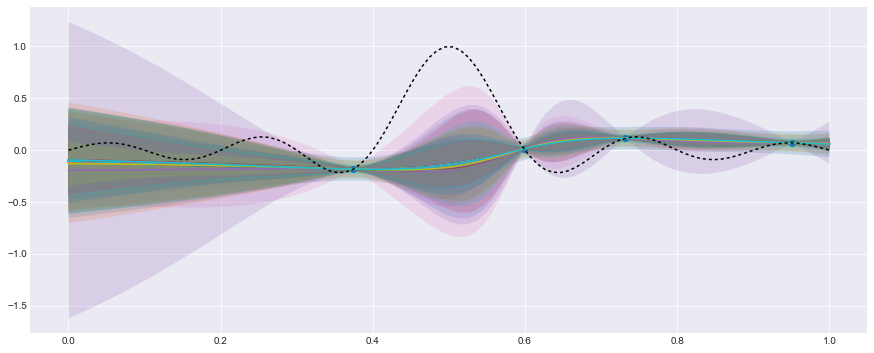

In [149]:
from src.models import *
from src.acquisition_functions import UCB
from src.neural_network import NNRegressionModel


def f(x):
    return np.sinc(x * 10 - 5).sum(axis=1)[:, None]


rng = np.random.RandomState(42)
x_train = rng.uniform(0, 1, 4)[:, None]
y_train = f(x_train)

################

nn = NNRegressionModel(input_dim=1, dim_basis=50, epochs=100, batch_size=10)
reg = BayesianLinearRegression(num_mcmc=10, burn_in=1000, mcmc_steps=1000)
model = BOModel(nn, regressor=reg)
model.init(x_train, y_train)

x = (np.linspace(0, 1, 100))[:, None]
y = f(x)
model.plot_prediction(x, y)


In [ ]:
# acq = EI(model, par=0.01)
acq = UCB(model)
bo = BO(f, model, acquisition_function=acq, n_iter=20, bounds=np.array([[0, 1]]))
bo.run()

... starting round 0 / 3


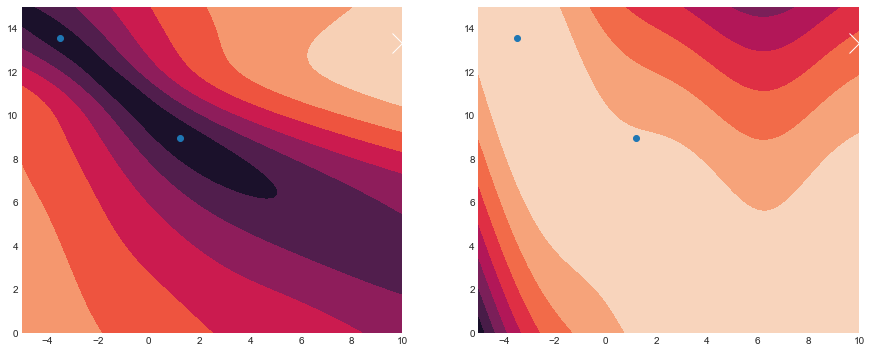

... starting round 1 / 3


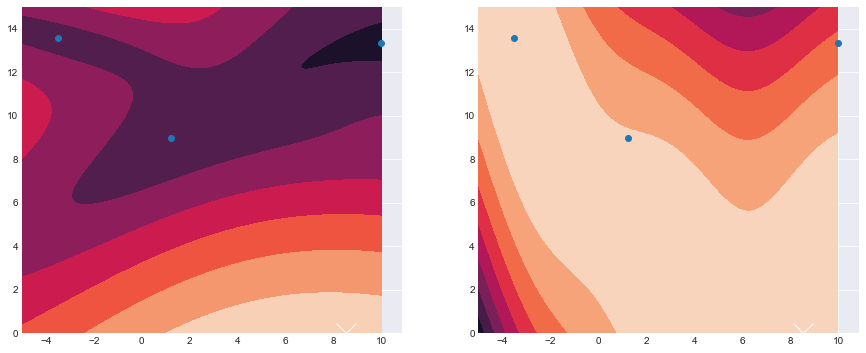

... starting round 2 / 3


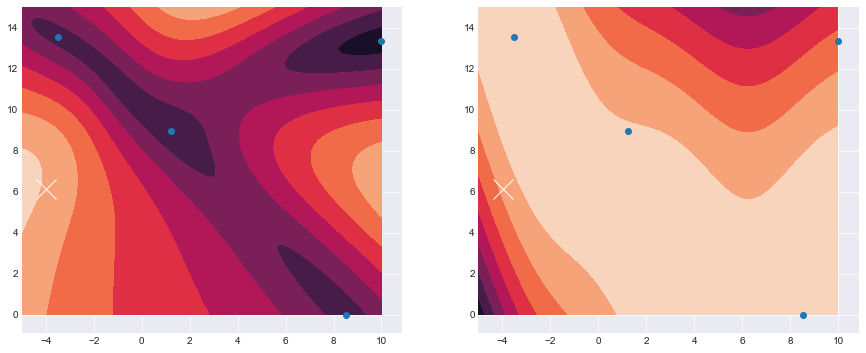

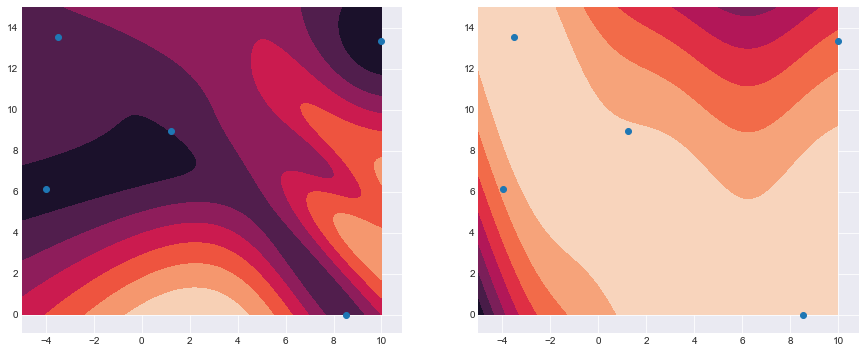

In [147]:
from src.tests import *
from hpolib.benchmarks.synthetic_functions import Branin
f, bounds, f_opt = prepare_benchmark(Branin())

boo = test_dngo_10_10_10_pe(f, bounds, 3, do_plot=True)

In [148]:
import tensorflow as tf
boo.model.sess = tf.Session()
model = boo.model
model.fit(model.X, model.Y)
fig = boo.plot_2D_surface(use_plotly=True)
iplot(fig)

This is the format of your plot grid:
[ (1,1) scene1 ]  [ (1,2) scene2 ]
[ (2,1) scene3 ]  [ (2,2) scene4 ]



In [1]:
from src.tests import *

bo_models, bo_names, immediate_regret = test_multiple({
    # test_gp': test_gp,
    # 'test_dngo_50_50_50_pe': test_dngo_50_50_50_pe,
    'test_dngo_10_10_10_pe': test_dngo_10_10_10_pe,
    # 'test_dngo_50_50_50_marg': test_dngo_50_50_50_marg,
}, n_iter=100)

reconstraining parameters rbf.variance
 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


... starting round 0 / 100
... starting round 1 / 100
... starting round 0 / 100
... starting round 1 / 100
... starting round 2 / 100
... starting round 3 / 100
... starting round 2 / 100
... starting round 4 / 100
... starting round 5 / 100
... starting round 6 / 100
... starting round 7 / 100
... starting round 8 / 100
... starting round 3 / 100
... starting round 9 / 100
... starting round 10 / 100
... starting round 4 / 100
... starting round 11 / 100
... starting round 12 / 100
... starting round 13 / 100
... starting round 14 / 100
... starting round 5 / 100
... starting round 15 / 100
... starting round 16 / 100
... starting round 17 / 100
... starting round 6 / 100
... starting round 18 / 100
... starting round 19 / 100
... starting round 20 / 100
... starting round 7 / 100
... starting round 21 / 100
... starting round 22 / 100
... starting round 23 / 100
... starting round 8 / 100
... starting round 24 / 100
... starting round 25 / 100
... starting round 26 / 100


Exception: Error during the conversion of the provided into a ConfigSpace.Configuration object

... starting round 27 / 100
... starting round 28 / 100
... starting round 29 / 100
... starting round 30 / 100
... starting round 31 / 100
... starting round 32 / 100
... starting round 33 / 100
... starting round 34 / 100
... starting round 35 / 100
... starting round 36 / 100
... starting round 37 / 100
... starting round 38 / 100
... starting round 39 / 100
... starting round 40 / 100
... starting round 41 / 100
... starting round 42 / 100
... starting round 43 / 100
... starting round 44 / 100
... starting round 45 / 100
... starting round 46 / 100
... starting round 47 / 100
... starting round 48 / 100
... starting round 49 / 100
... starting round 50 / 100
... starting round 51 / 100
... starting round 52 / 100
... starting round 53 / 100
... starting round 54 / 100
... starting round 55 / 100
... starting round 56 / 100
... starting round 57 / 100
... starting round 58 / 100
... starting round 59 / 100
... starting round 60 / 100
... starting round 61 / 100
... starting round 6

In [35]:
plot_ir(immediate_regret)
plt.legend(bo_names)
plt.show()

NameError: name 'immediate_regret' is not defined

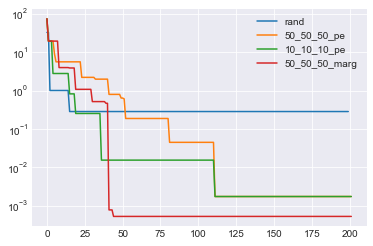

In [7]:
plot_ir([
    acc_ir(rand_f_his, f_opt),
    acc_ir(bo2.model.Y, f_opt), 
    acc_ir(bo3.model.Y, f_opt), 
    acc_ir(bo4.model.Y, f_opt),
])
plt.legend(["rand", "50_50_50_pe", "10_10_10_pe", "50_50_50_marg"])
plt.show()

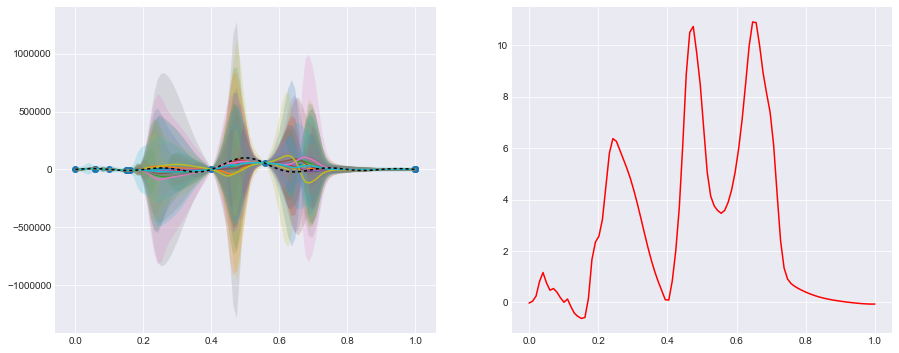

In [15]:
bo.plot_prediction()